In [1]:
import pandas as pd
file_path = r"C:\Users\Lenovo\Desktop\Data Analytics Assignment.xlsx"
df = pd.read_excel(file_path)
excel_file = pd.ExcelFile(file_path)
print(df.head())


   Unnamed: 0        Unnamed: 1    Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0         NaN               NaN           NaN         NaN         NaN   
1         NaN        Total Data           NaN         NaN         NaN   
2         NaN              Date  unique_idfas  unique_ips  unique_uas   
3         NaN  11 Sep to 15 Sep       1191603     1189884          28   
4         NaN               NaN           NaN         NaN         NaN   

       Unnamed: 5         Unnamed: 6   Unnamed: 7            Unnamed: 8  \
0             NaN                NaN          NaN                   NaN   
1             NaN                NaN          NaN                   NaN   
2  total_requests  requests_per_idfa  impressions  impressions_per_idfa   
3         1770702           1.485983            0                     0   
4             NaN                NaN          NaN                   NaN   

      Unnamed: 9    Unnamed: 10 Unnamed: 11  
0            NaN            NaN         NaN  
1            NaN  

In [2]:
excel_file.sheet_names

['Valid 1', 'Valid 2', 'Valid 3', 'Invalid 1', 'Invalid 2', 'Invalid 3']

In [3]:
sheets = {sheet: excel_file.parse(sheet) for sheet in excel_file.sheet_names}

In [4]:
summary_info = {
    sheet: {
        "shape": sheets[sheet].shape,
        "columns": list(sheets[sheet].columns),
        "head": sheets[sheet].head(3).to_dict()
    }
    for sheet in sheets
}

summary_info

{'Valid 1': {'shape': (101, 12),
  'columns': ['Unnamed: 0',
   'Unnamed: 1',
   'Unnamed: 2',
   'Unnamed: 3',
   'Unnamed: 4',
   'Unnamed: 5',
   'Unnamed: 6',
   'Unnamed: 7',
   'Unnamed: 8',
   'Unnamed: 9',
   'Unnamed: 10',
   'Unnamed: 11'],
  'head': {'Unnamed: 0': {0: nan, 1: nan, 2: nan},
   'Unnamed: 1': {0: nan, 1: 'Total Data', 2: 'Date'},
   'Unnamed: 2': {0: nan, 1: nan, 2: 'unique_idfas'},
   'Unnamed: 3': {0: nan, 1: nan, 2: 'unique_ips'},
   'Unnamed: 4': {0: nan, 1: nan, 2: 'unique_uas'},
   'Unnamed: 5': {0: nan, 1: nan, 2: 'total_requests'},
   'Unnamed: 6': {0: nan, 1: nan, 2: 'requests_per_idfa'},
   'Unnamed: 7': {0: nan, 1: nan, 2: 'impressions'},
   'Unnamed: 8': {0: nan, 1: nan, 2: 'impressions_per_idfa'},
   'Unnamed: 9': {0: nan, 1: nan, 2: 'idfa_ip_ratio'},
   'Unnamed: 10': {0: nan, 1: nan, 2: 'idfa_ua_ratio'},
   'Unnamed: 11': {0: nan, 1: nan, 2: 'IVT'}}},
 'Valid 2': {'shape': (101, 12),
  'columns': ['Unnamed: 0',
   'Unnamed: 1',
   'Unnamed: 2',
 

In [5]:
def clean_sheet(sheet_name, status):
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=2) 
    df = df.dropna(subset=['Date'])  
    df["App_Name"] = sheet_name
    df["Status"] = status
    return df

In [6]:
sheet_name = "Valid 1"
df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
print(df.head(5))
print("\nColumn names (first few rows):")
print(df.iloc[0:3])


   0                 1             2           3           4               5   \
0 NaN               NaN           NaN         NaN         NaN             NaN   
1 NaN               NaN           NaN         NaN         NaN             NaN   
2 NaN        Total Data           NaN         NaN         NaN             NaN   
3 NaN              Date  unique_idfas  unique_ips  unique_uas  total_requests   
4 NaN  11 Sep to 15 Sep       1191603     1189884          28         1770702   

                  6            7                     8              9   \
0                NaN          NaN                   NaN            NaN   
1                NaN          NaN                   NaN            NaN   
2                NaN          NaN                   NaN            NaN   
3  requests_per_idfa  impressions  impressions_per_idfa  idfa_ip_ratio   
4           1.485983            0                     0       1.001445   

              10        11  
0            NaN       NaN  
1         

In [7]:
def clean_sheet(sheet_name, status):
    
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=3)
    
    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    
    if 'date' not in df.columns:
        print(f"⚠️ No date column found in {sheet_name}. Found: {df.columns.tolist()}")
    else:
        df = df.dropna(subset=['date'])
    
    
    df["app_name"] = sheet_name
    df["status"] = status
    return df

In [8]:
valid_sheets = [clean_sheet(sheet, "Valid") for sheet in ["Valid 1", "Valid 2", "Valid 3"]]
invalid_sheets = [clean_sheet(sheet, "Invalid") for sheet in ["Invalid 1", "Invalid 2", "Invalid 3"]]

In [9]:
merged_df = pd.concat(valid_sheets + invalid_sheets, ignore_index=True)

print(merged_df.columns)
print(merged_df.head())

Index(['unnamed:_0', 'date', 'unique_idfas', 'unique_ips', 'unique_uas',
       'total_requests', 'requests_per_idfa', 'impressions',
       'impressions_per_idfa', 'idfa_ip_ratio', 'idfa_ua_ratio', 'ivt',
       'app_name', 'status'],
      dtype='object')
   unnamed:_0                 date  unique_idfas  unique_ips  unique_uas  \
0         NaN     11 Sep to 15 Sep       1191603     1189884          28   
1         NaN           Daily Data           NaN         NaN         NaN   
2         NaN                 Date  unique_idfas  unique_ips  unique_uas   
3         NaN  2025-09-11 00:00:00         93345       93340          22   
4         NaN  2025-09-12 00:00:00        515646      515307          25   

   total_requests  requests_per_idfa  impressions  impressions_per_idfa  \
0         1770702           1.485983            0                     0   
1             NaN                NaN          NaN                   NaN   
2  total_requests  requests_per_idfa  impressions  impressio

In [10]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unnamed:_0            0 non-null      float64
 1   date                  564 non-null    object 
 2   unique_idfas          552 non-null    object 
 3   unique_ips            552 non-null    object 
 4   unique_uas            552 non-null    object 
 5   total_requests        552 non-null    object 
 6   requests_per_idfa     552 non-null    object 
 7   impressions           552 non-null    object 
 8   impressions_per_idfa  552 non-null    object 
 9   idfa_ip_ratio         552 non-null    object 
 10  idfa_ua_ratio         552 non-null    object 
 11  ivt                   552 non-null    object 
 12  app_name              564 non-null    object 
 13  status                564 non-null    object 
dtypes: float64(1), object(13)
memory usage: 61.8+ KB
None


In [11]:
summary = merged_df.groupby("status")[[
    "unique_idfas", "unique_ips", "unique_uas",
    "total_requests", "requests_per_idfa",
    "impressions", "impressions_per_idfa",
    "idfa_ip_ratio", "idfa_ua_ratio", "ivt"
]].describe()

print(summary)

        unique_idfas                           unique_ips                     \
               count unique           top freq      count unique         top   
status                                                                         
Invalid          276    268  unique_idfas    6        276    271  unique_ips   
Valid            276    270  unique_idfas    6        276    271  unique_ips   

             unique_uas         ... idfa_ip_ratio      idfa_ua_ratio         \
        freq      count unique  ...           top freq         count unique   
status                          ...                                           
Invalid    6        276    174  ...             1  124           276    271   
Valid      6        276     67  ...             1   67           276    271   

                              ivt                  
                   top freq count unique top freq  
status                                             
Invalid  idfa_ua_ratio    6   276     85   1  1

In [12]:
merged_df['requests_per_idfa'] = pd.to_numeric(merged_df['requests_per_idfa'], errors='coerce')
merged_df['idfa_ip_ratio'] = pd.to_numeric(merged_df['idfa_ip_ratio'], errors='coerce')
merged_df['idfa_ua_ratio'] = pd.to_numeric(merged_df['requests_per_idfa'], errors='coerce')


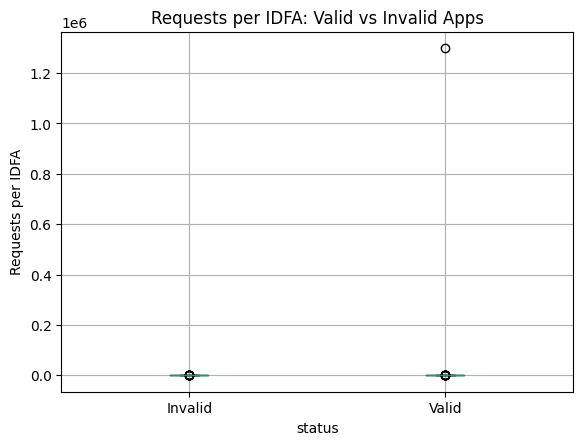

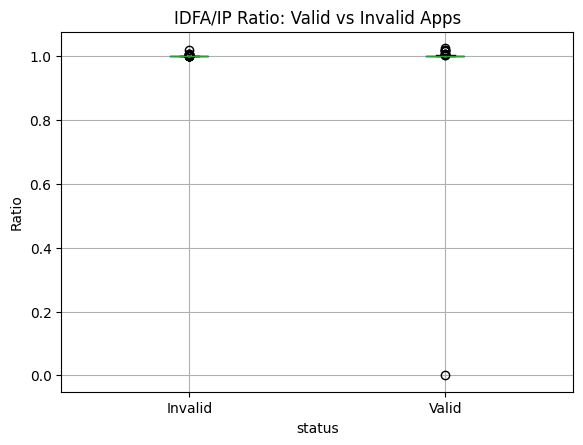

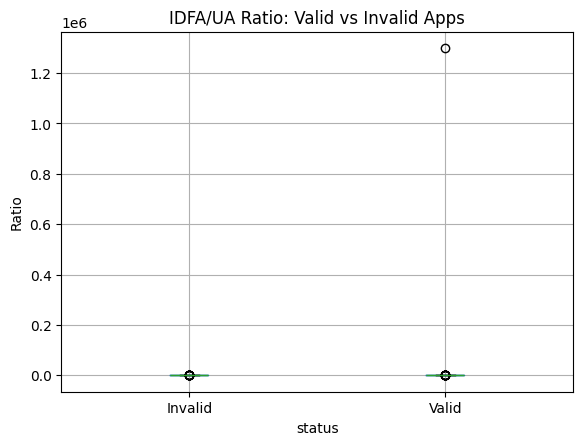

In [13]:
import matplotlib.pyplot as plt

# Requests per IDFA comparison
merged_df.boxplot(column='requests_per_idfa', by='status')
plt.title("Requests per IDFA: Valid vs Invalid Apps")
plt.suptitle("")
plt.ylabel("Requests per IDFA")
plt.show()

# IDFA/IP Ratio comparison
merged_df.boxplot(column='idfa_ip_ratio', by='status')
plt.title("IDFA/IP Ratio: Valid vs Invalid Apps")
plt.suptitle("")
plt.ylabel("Ratio")
plt.show()

# IDFA/UA Ratio comparison
merged_df.boxplot(column='idfa_ua_ratio', by='status')
plt.title("IDFA/UA Ratio: Valid vs Invalid Apps")
plt.suptitle("")
plt.ylabel("Ratio")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_368\4249628616.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")


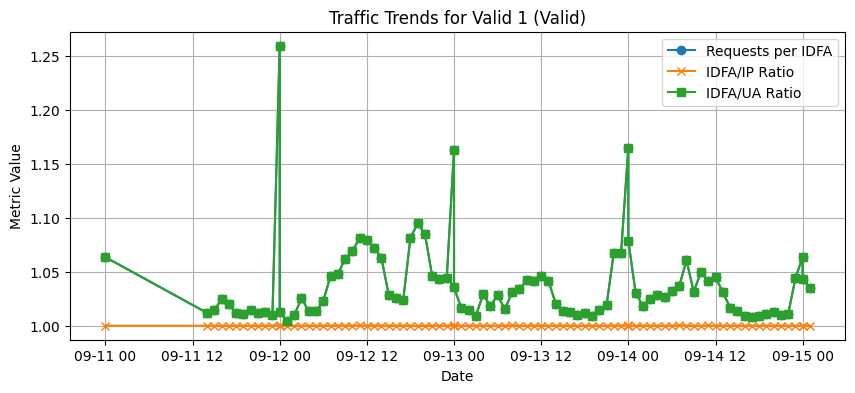

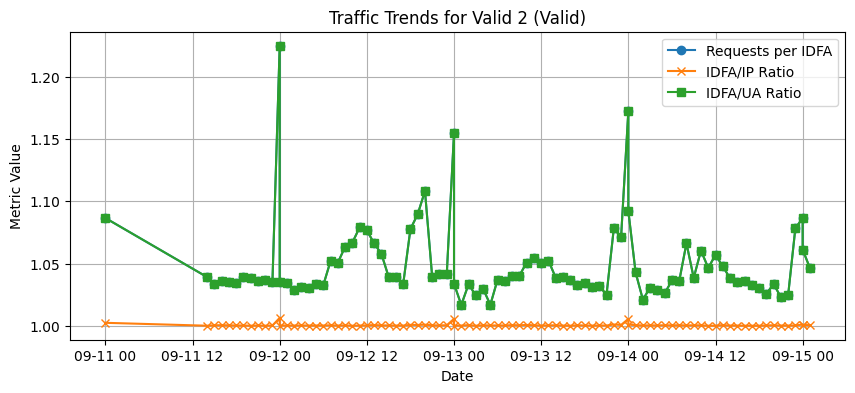

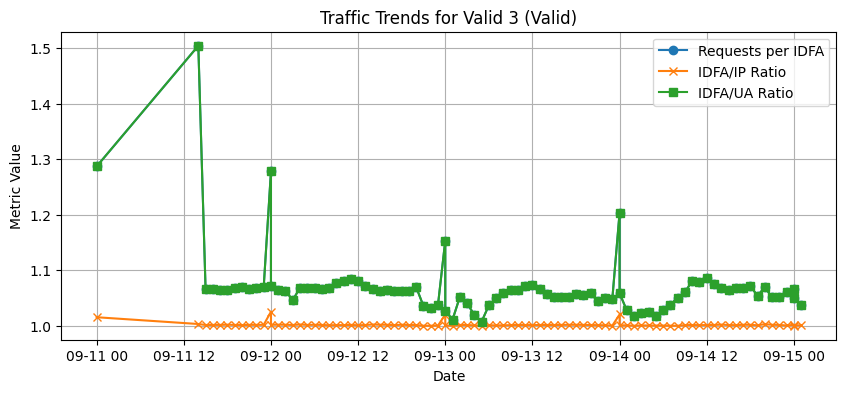

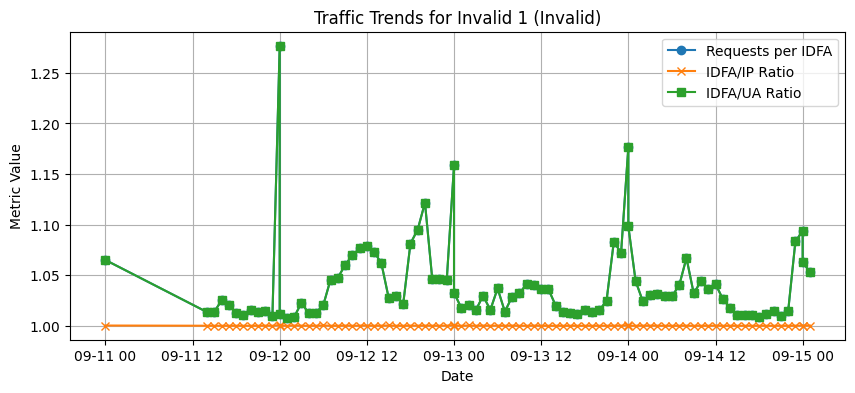

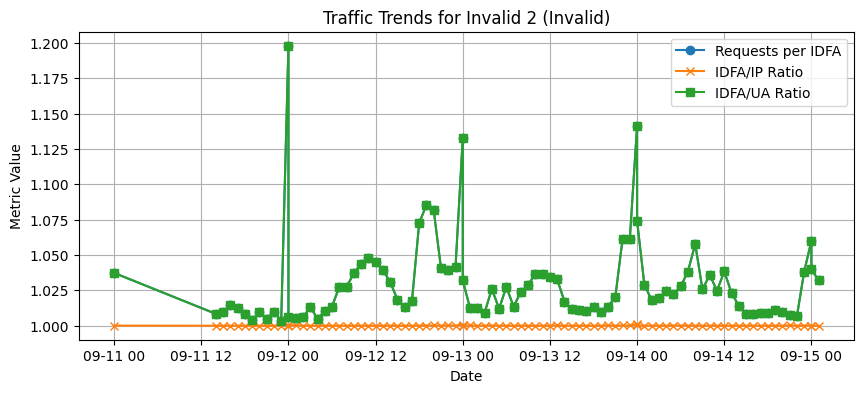

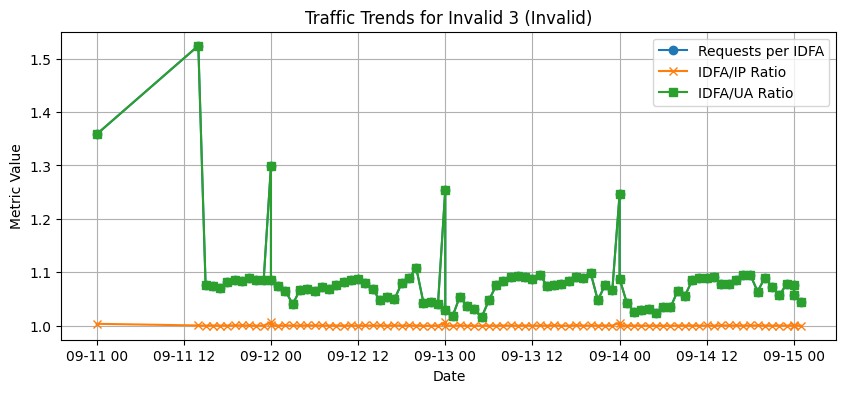

In [14]:
# Convert date to datetime (if not already)
merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")

# Plot traffic patterns for each app
for app in merged_df["app_name"].unique():
    subset = merged_df[merged_df["app_name"] == app]
    subset = subset.sort_values("date")

    plt.figure(figsize=(10,4))
    plt.plot(subset["date"], subset["requests_per_idfa"], label="Requests per IDFA", marker='o')
    plt.plot(subset["date"], subset["idfa_ip_ratio"], label="IDFA/IP Ratio", marker='x')
    plt.plot(subset["date"], subset["idfa_ua_ratio"], label="IDFA/UA Ratio", marker='s')
    plt.title(f"Traffic Trends for {app} ({subset['status'].iloc[0]})")
    plt.xlabel("Date")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.grid(True)
    plt.show()


In [15]:
merged_df.to_excel("C:/Users/Lenovo/Desktop/Cleaned_Traffic_Data.xlsx", index=False)
